In [16]:
# assignment_5_risk.ipynb

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


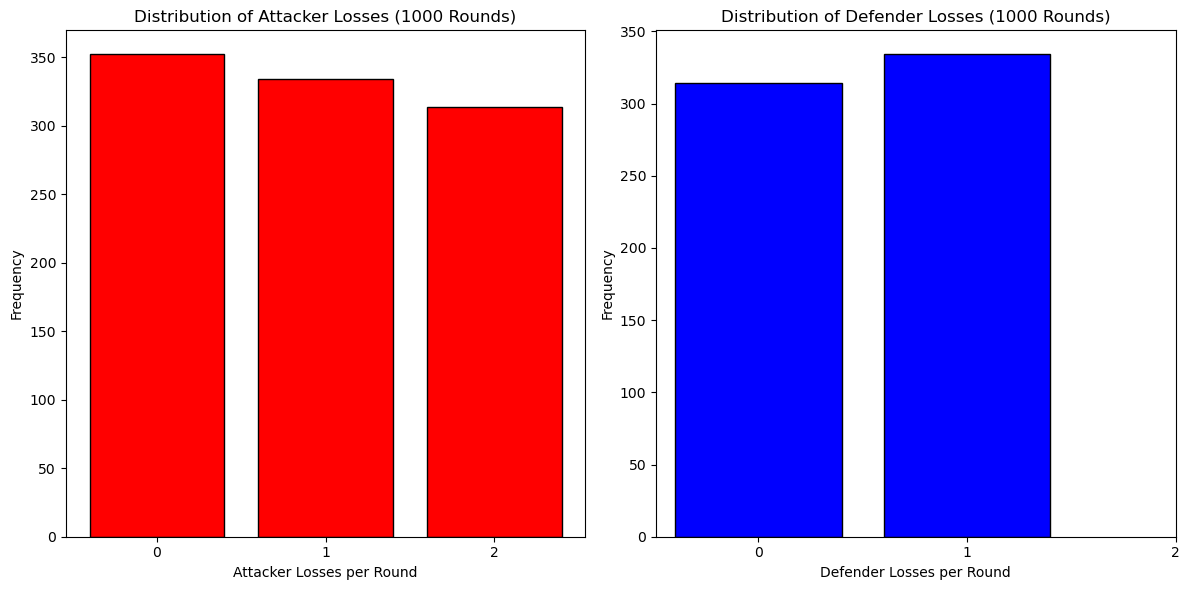

: 

In [ ]:
# Initialise the random number generator
rng = np.random.default_rng()

# Function to simulate a single battle round with 3 attacker dice and 2 defender dice
# This function handles the rules provided for a single battle round in the assignment brief.
def battle_round():
    # Use the generator's integers method to roll dice for attacker and defender
    attacker_dice = np.sort(rng.integers(1, 7, size=3))[::-1]  # Top 3 rolls for attacker
    defender_dice = np.sort(rng.integers(1, 7, size=2))[::-1]  # Top 2 rolls for defender
    
    attacker_losses = 0
    defender_losses = 0
    
    # Compare the highest two dice rolls as specified in the assignment brief
    for i in range(2):  # Only compare the two highest dice
        if attacker_dice[i] > defender_dice[i]:
            defender_losses += 1
        else:
            attacker_losses += 1
            
    # Return losses for each side based on the rules provided in the brief
    return attacker_losses, defender_losses

# Part 1 of the Assignment: Simulate 1000 individual battle rounds and store the results
rounds = 1000
attacker_losses = []
defender_losses = []

for _ in range(rounds):
    # For each round, record the attacker and defender losses
    a_loss, d_loss = battle_round()
    attacker_losses.append(a_loss)
    defender_losses.append(d_loss)

# Plotting the results of 1000 battle rounds
# This addresses the requirement to plot results of the individual battle rounds
plt.figure(figsize=(12, 6))

# Plot histogram of attacker losses
plt.subplot(1, 2, 1)
plt.hist(attacker_losses, bins=np.arange(0, 4) - 0.5, edgecolor='black', rwidth=0.8, color='red')
plt.xticks([0, 1, 2])
plt.xlabel("Attacker Losses per Round")
plt.ylabel("Frequency")
plt.title("Distribution of Attacker Losses (1000 Rounds)")

# Plot histogram of defender losses
plt.subplot(1, 2, 2)
plt.hist(defender_losses, bins=np.arange(0, 3) - 0.5, edgecolor='black', rwidth=0.8, color='blue')
plt.xticks([0, 1, 2])
plt.xlabel("Defender Losses per Round")
plt.ylabel("Frequency")
plt.title("Distribution of Defender Losses (1000 Rounds)")

# Display the histograms side-by-side for comparison
plt.tight_layout()
plt.show()


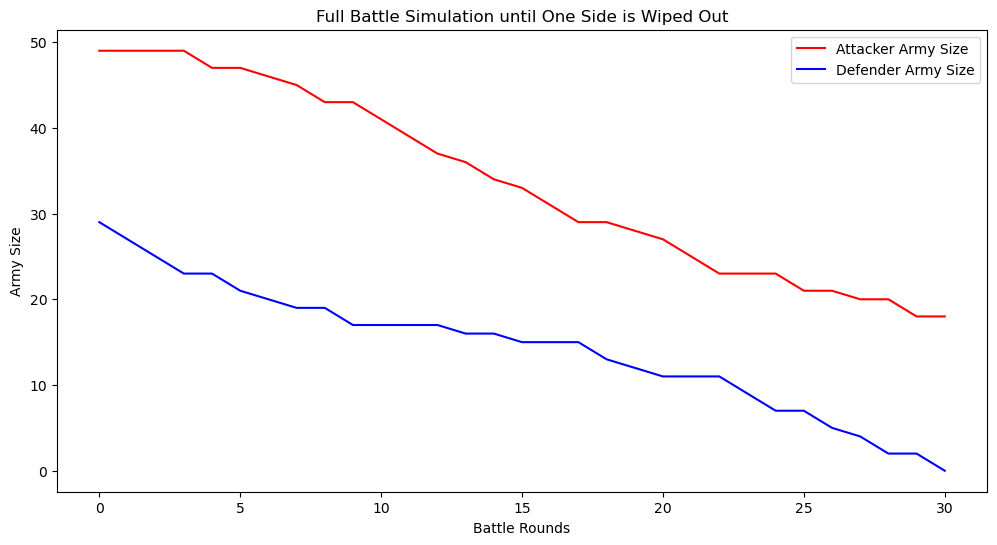

In [15]:
# Part 2 of the Assignment: Full series of rounds for arbitrary army sizes until one side is wiped out
# This section is for the "last few marks" as it simulates a full battle with armies of arbitrary sizes
def simulate_full_battle(attacker_army, defender_army):
    rounds = 0
    attacker_losses_series = []
    defender_losses_series = []
    
    # Continue the battle until one side is wiped out
    while attacker_army > 1 and defender_army > 0:
        rounds += 1
        a_loss, d_loss = battle_round()
        
        # Update armies based on losses from each round
        attacker_army -= a_loss
        defender_army -= d_loss
        
        # Record the size of each army after each round
        attacker_losses_series.append(attacker_army)
        defender_losses_series.append(defender_army)
        
        # End the battle if any army is wiped out
        if attacker_army <= 1 or defender_army <= 0:
            break
    
    # Return the number of rounds and the progression of each army's size
    return rounds, attacker_losses_series, defender_losses_series

# Example: Simulate a battle with arbitrary starting army sizes
# This example simulates a full battle with 50 attacker troops and 30 defender troops
attacker_army = 50
defender_army = 30

rounds, attacker_losses_series, defender_losses_series = simulate_full_battle(attacker_army, defender_army)

# Plot the full battle results over time
# This addresses the advanced part of the assignment where the army size progression is plotted
plt.figure(figsize=(12, 6))
plt.plot(attacker_losses_series, label="Attacker Army Size", color="red")
plt.plot(defender_losses_series, label="Defender Army Size", color="blue")
plt.xlabel("Battle Rounds")
plt.ylabel("Army Size")
plt.title("Full Battle Simulation until One Side is Wiped Out")
plt.legend()
plt.show()
